# Development of Process Portable Design Automation for Analog Circuits

```
Proposal to SSCS PICO Chipathon 2023
```

## Team Members

Contact: Akira Tsuchiya (supervisor of the team), tsuchiya.a@e.usp.ac.jp / a_tsuchiya@ieee.org

|Name|Affiliation|IEEE Member|SSCS Member|
|:--:|:----------:|:----------:|:----------:|
|Miho Yamada|CenterQ, Japan|No|No|
|Ryotaro Hotta|Ritsumeikan University, Japan|No|No|
|Itsuki Matsubara|Ritsumeikan University, Japan|No|No|
|Ryos Suzuki|Sinby Corp., Japan|No|No|
|Mizuki Mori|Keio University, Japan|No|No|
|Noritsuna Imamura|OurStars, Japan|No|No|
|Akira Tsuchiya|The University of Shiga Prefecture, Japan|Yes|Yes|


## Summary of our project

**Target blocks:**
PLL for clock generation and A/D converter

**Key feature:**
Block-based layout generation platform

**Expected contribution:**
- IP of ADPLL and SAR-ADC
- Establishment of ADPLL design using digital design flow
- Layout generation platform
- SAR-ADC design using the proposed system, block-based design
- Process porting from sky130 to gf180mcu


## Motivation

For future open-source IC community, we think that soft-IP is very important. Especially, analog circuits have wide variety of architectures, target specs, design techniques. Additionally, analog design strongly depends on fabrication process. Now, the number of open-source PDKs is increasing. So, we need analog circuit/layout generation from soft-IP.

In this program, we want to try design automation of analog circuits in digital flow and our original flow. As the target of digital flow, we chose an ADPLL for clock generation.
As the target of original analog layout generation, we chose SAR-ADC because a member has experience of tape-out in sky130.


## Key features of proposal

**analog layout generation: block-based design**

Our key feature is an analog layout generation platform. We construct layout by tiling rectangular pieces (called "block") instead of free layout drawing. This idea is similar to grid-based design, for example laygo2 in BAG. The difference is that all metal wires are also in blocks.

**Benefits:**
- Reducing Design Cost
Since all wires are also constructed by block, parasitics are modeled before layout. So, designers can consider parasitics from early stage of design. Modeled wire blocks suppress the gap between schematic and post-layout simulation, so design cost will be reduced.

- Suitable for both automated-design and hand-layout
Tiling blocks are suitable for automated placement and routing compared to free drawing. Also, the blocks can be used for hand-layout. The blocks are designed to pass DRC, and has information about parasitics.

- Easy-to-customize
Users can create/customize blocks easily. So, if a user creates a good set of blocks, the set can be shared. We believe that easy commitment from users will help idea exchange among users.

We already verified this system works in sky130, and completed tape-out in OpenMPW-6. After we get OpenMPW-6 chips, feedback from silicon-measurement will make this system better, we hope.

**Drawbacks:**
- Area overhead: in sky130 design, the area overhead against hand-layout is over 10%. Shrinking block area can reduce area overhead, but there is a trade-off between area and modeling accuracy.
- Performance degradation
Similar to area overhead, the wire length becomes longer than full-custom layout. So, the parasitics can degrade the circuit performance. When we designed SAR-ADC in sky130, the performance degradation was not serious, less than 3%. But we have to take care of the impact of long wires.

**Challenges:**
- Modeling accuracy
One of the features of the proposed system is modeled wire block. However, modeling method has not been established yet. Parasitic capacitance is affected by neighboring blocks. So, how to model each block is still open problem. We will try to improve this problem.

- Process portability from sky130 to gf180.
As increasing the number of available fabrication processes, process portability will become an important issue. The block-based design has been tested in sky130, so in this program, we try to verify and realize process portability.


## Preliminary work: OpenMPW-6

The block-based design flow was tested in OpenMPW-6.
https://github.com/ranan-usp/caravel_user_project_analog

Designed circuit is a 6-bit SAR-ADC shown below.
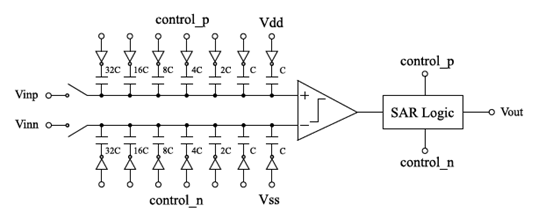

The layout of analog part was done by block-based platform. For example, the schematic of the dynamic comparator is:
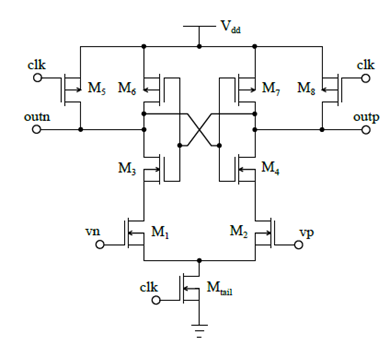

A layout was generated from the schematic. You can see grid showing blocks.
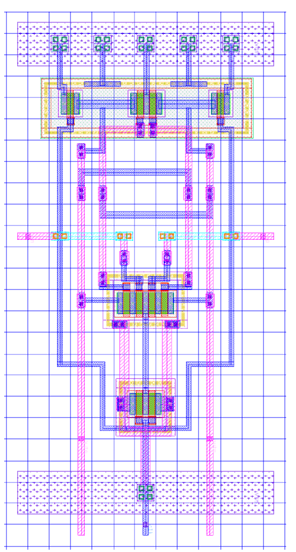

Capacitor-array was also designed by blocks.
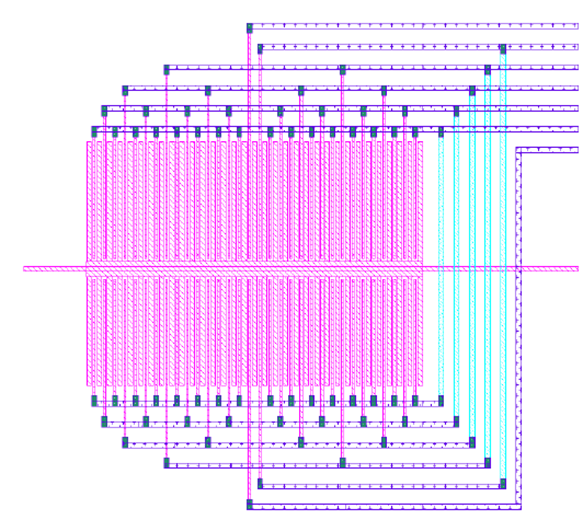

Overall SAR-ADC is as below.
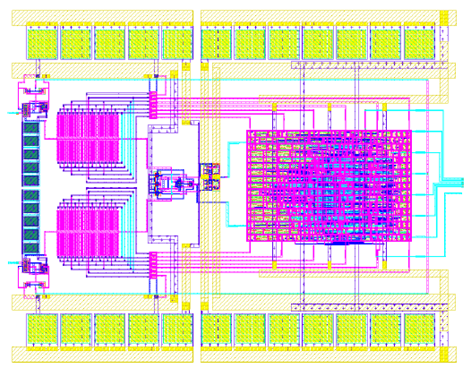

The performance was not superior to hand-made layout, but we got similar performance.
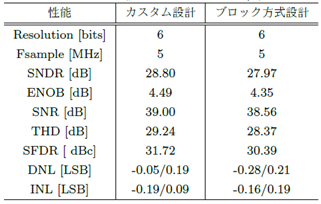

Now, we are waiting for delivery of OpenMPW-6.


## Contributions
We focus on design automation rather than circuit performance. So, the spec of designed PLL and ADC will be mature. However, we establish ADPLL in digital flow and propose an analog layout generation. Our results will help wide range of designers.


## Team Organization
The team was formed from open-source communities in Japan. So, members' affiliation has wide variety. The supervisor Akira Tsuchiya, who has over 20 years analog IC design and tape-out in OpenMPW program, will manage the team and give advices in design, tools and so on.
